In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
my_cmap = 'gist_rainbow'

In [19]:
# load the data from csv files
def load_from_fragments(name):
    path = 'data/binarized_' + name + '.csv'
    data = pd.read_csv(path, index_col=0)
    return data

In [20]:
data_029b0RMT = load_from_fragments('029b0RMT')
data_117h0RMT = load_from_fragments('117h0RMT')
print(data_029b0RMT.shape)
print(data_117h0RMT.shape)

data_029b0RMT
data_117h0RMT

(588, 42)
(616, 44)


,TLL01,TLL02,TLL03,TLL04,TBAL1,TBAL2,TBAL3,TBAL4,TBPL1,TBPL2,...,TBPR3,TBPR4,TBAR1,TBAR2,TBAR3,TBAR4,TLR01,TLR02,TLR03,TLR04
TLL01,1,1,0,1,1,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
TLL02,1,1,1,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
TLL03,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TLL04,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TBAL1,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TBAR4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
TLR01,0,0,0,1,1,1,0,0,1,0,...,0,0,1,1,1,0,1,1,0,0
TLR02,0,0,0,1,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,0,1
TLR03,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1


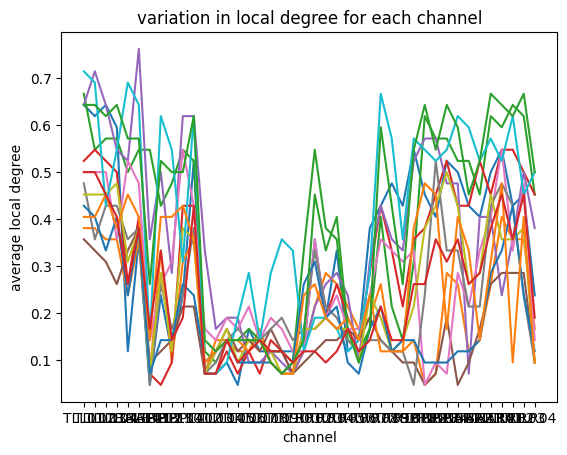

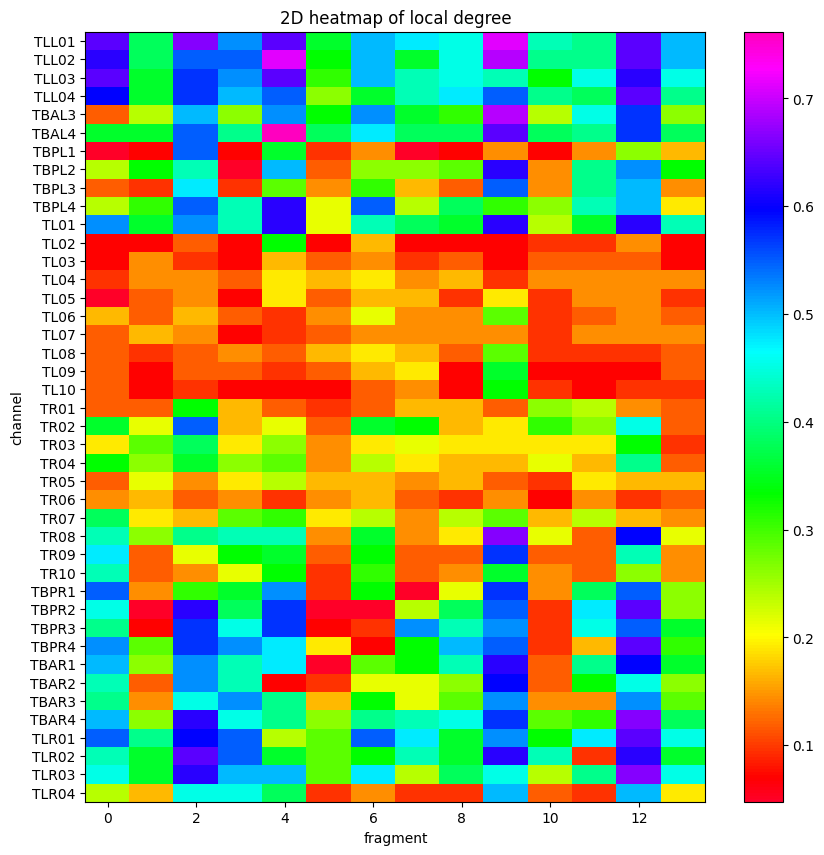

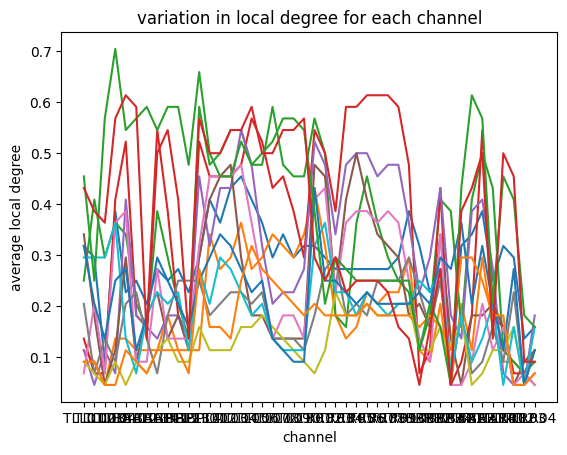

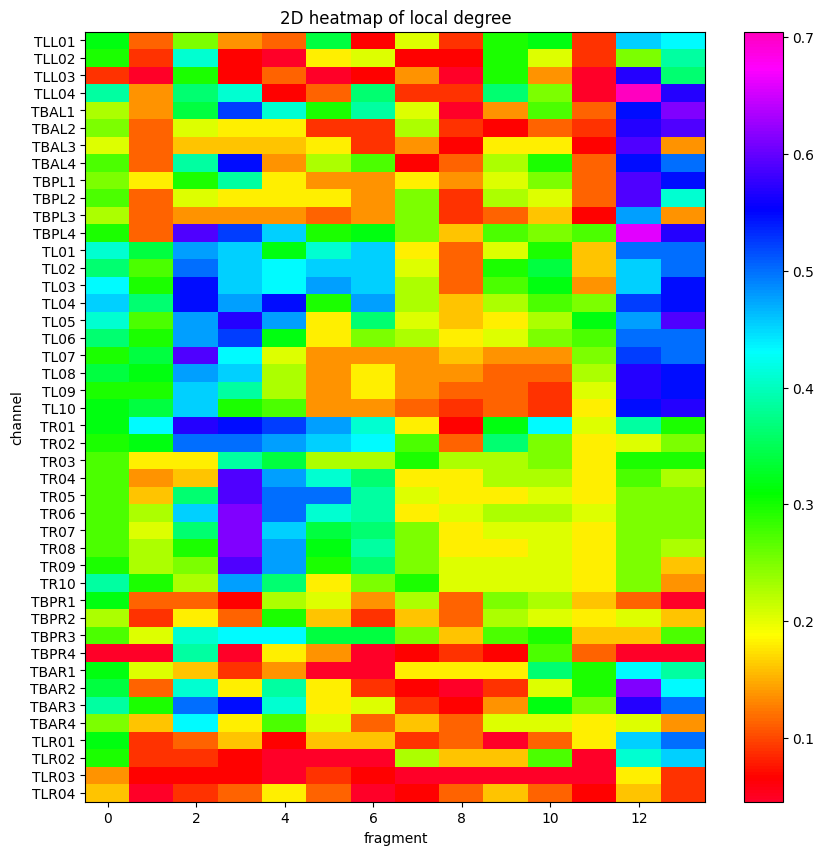

In [21]:
# part 1 : variation in local degree
def local_degree(data):
    local_degree = data.sum(axis=1)/data.shape[1]
    return local_degree

def plot_loc_degree(data):
    loc_deg_arr = np.zeros((int(data.shape[0]/data.shape[1]), data.shape[1]))

    num_channels = data.shape[1]
    # the channel names
    channels = data.columns
    for i in range(0, data.shape[0], num_channels):
        # get the local degree for each channel at each fragment
        loc_deg = local_degree(data.iloc[i:i+num_channels])
        loc_deg_arr[i//num_channels] = loc_deg
        plt.plot(loc_deg)
    plt.xlabel('channel')
    plt.ylabel('average local degree')
    plt.title('variation in local degree for each channel')
    plt.show()

    # plot a 2D heatmap of the local degree
    plt.figure(figsize=(10,10))
    plt.imshow(loc_deg_arr.transpose(), aspect='auto', cmap=my_cmap)
    plt.colorbar()
    plt.xlabel('fragment')
    plt.ylabel('channel')
    plt.title('2D heatmap of local degree')
    plt.yticks(range(num_channels), channels)
    plt.show()
    
plot_loc_degree(data_029b0RMT)
plot_loc_degree(data_117h0RMT)


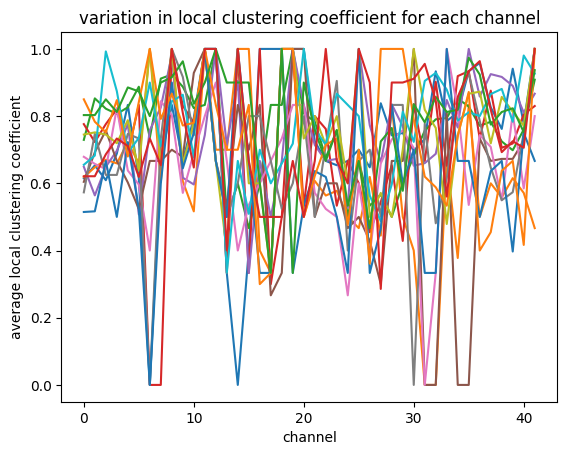

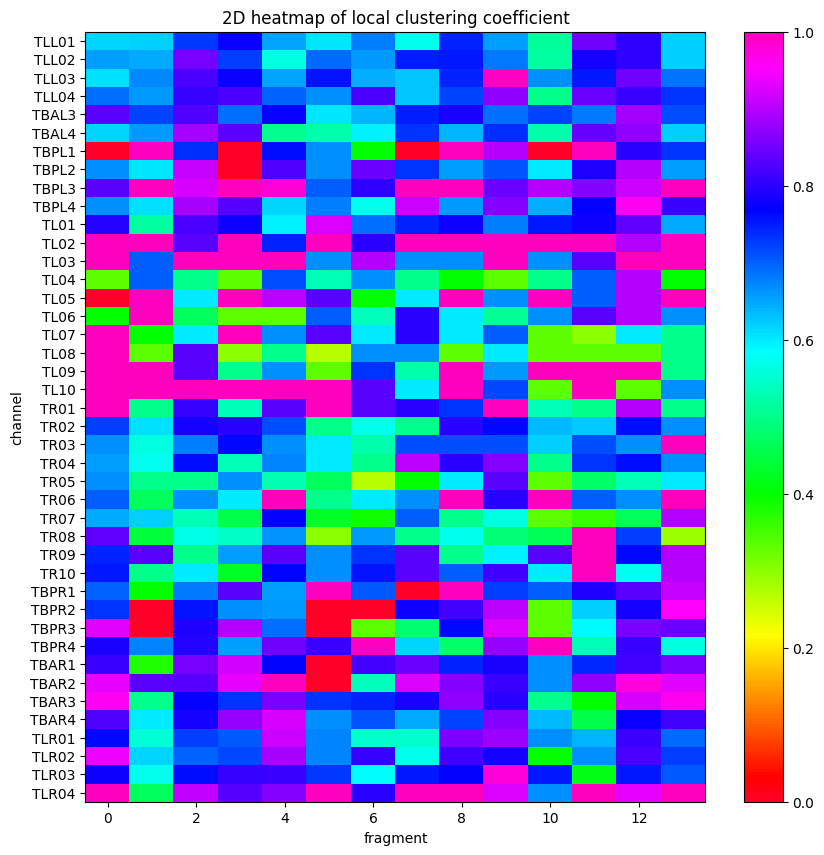

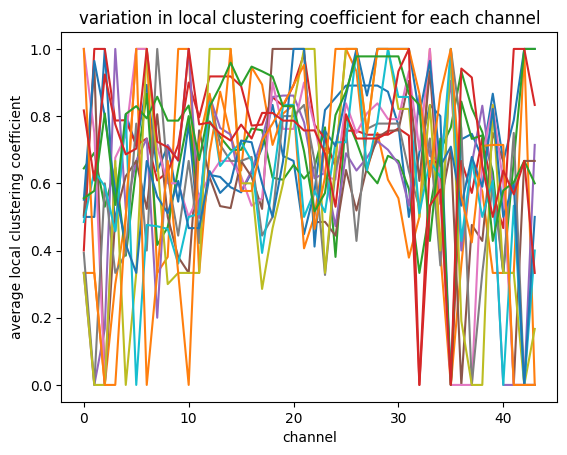

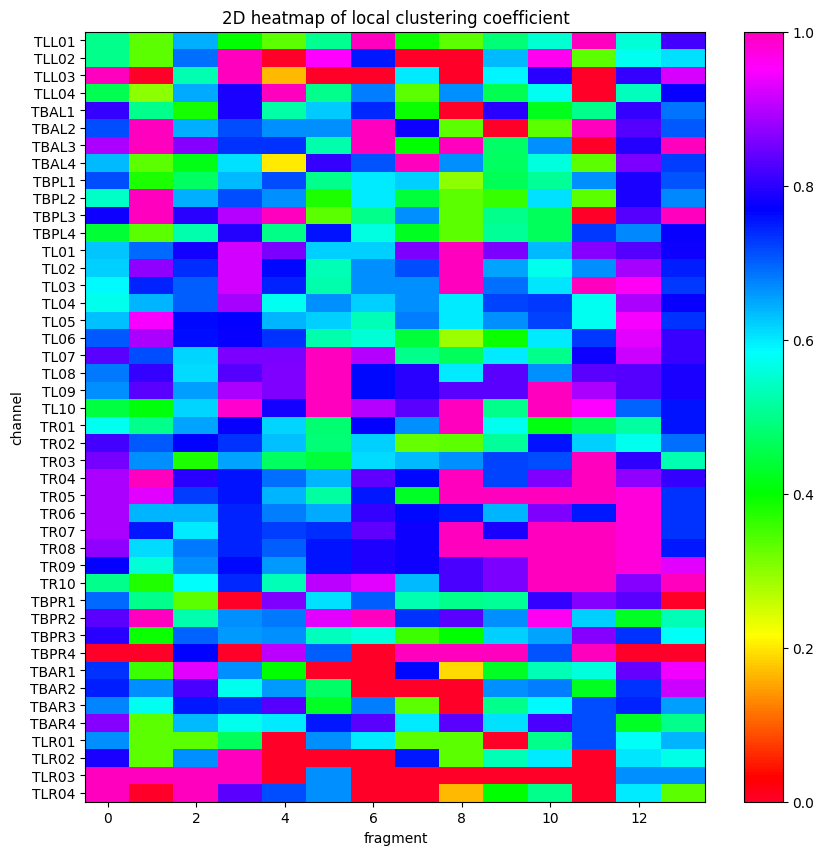

In [22]:
# local clustering coefficient using networkx
def local_clustering_coefficient(data):
    G = nx.from_pandas_adjacency(data)
    local_clustering = nx.clustering(G)
    return local_clustering

def plot_clustering_coefficient(data):
    loc_clust_arr = np.zeros((int(data.shape[0]/data.shape[1]), data.shape[1]))

    num_channels = data.shape[1]
    channels = data.columns
    for i in range(0, data.shape[0], num_channels):
        # get the local clustering coefficient for each channel at each fragment
        loc_clust = local_clustering_coefficient(data.iloc[i:i+num_channels])
        loc_clust_arr[i//num_channels] = list(loc_clust.values())
        plt.plot(list(loc_clust.values()))
    plt.xlabel('channel')
    plt.ylabel('average local clustering coefficient')
    plt.title('variation in local clustering coefficient for each channel')
    plt.show()

    # plot a 2D heatmap of the local clustering coefficient using gist rainbow color scheme
    plt.figure(figsize=(10,10))
    # smoothen the heatmap
    plt.imshow(loc_clust_arr.transpose(), aspect='auto', cmap=my_cmap)
    plt.colorbar()
    plt.xlabel('fragment')
    plt.ylabel('channel')
    plt.title('2D heatmap of local clustering coefficient')
    plt.yticks(range(num_channels), channels)
    plt.show()

plot_clustering_coefficient(data_029b0RMT)
plot_clustering_coefficient(data_117h0RMT)

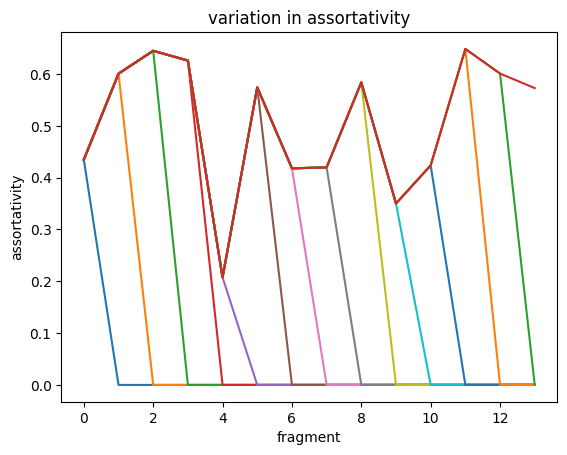

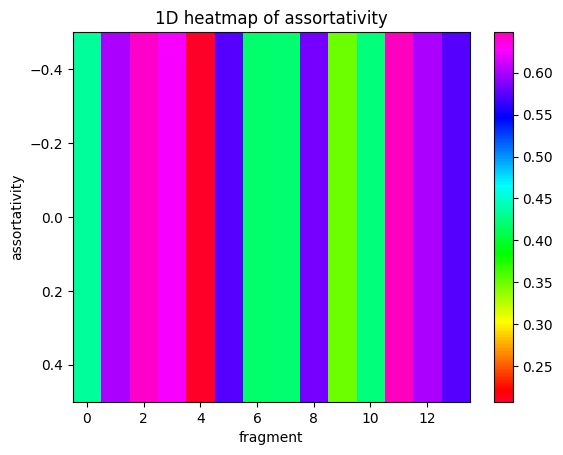

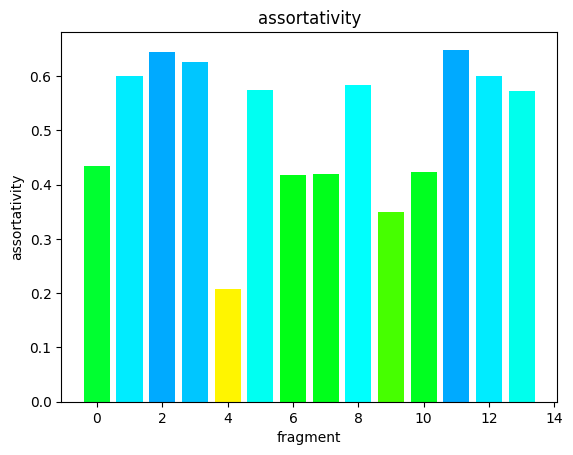

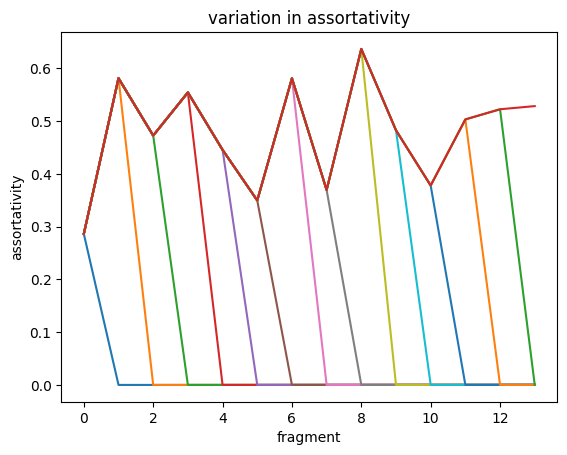

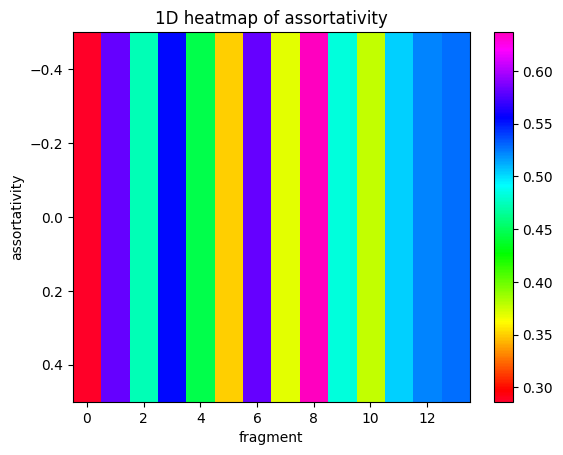

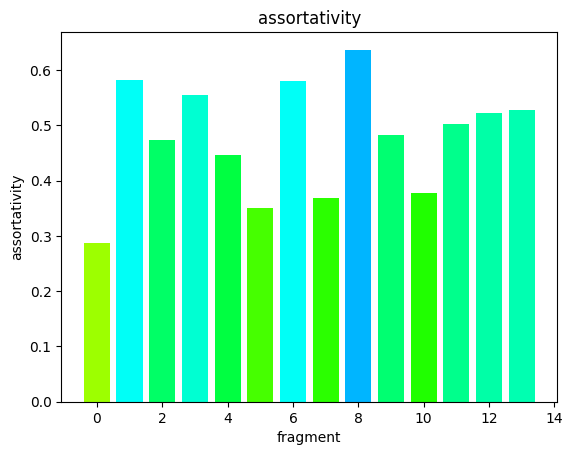

In [26]:
# assortativity using networkx
def assortativity(data):
    G = nx.from_pandas_adjacency(data)
    assortativity = nx.degree_assortativity_coefficient(G)
    return assortativity

def plot_assortativity(data):
    # assortativity_arr = np.zeros((int(data.shape[0]/data.shape[1]), 1))
    assortativity_arr = np.zeros(int(data.shape[0]/data.shape[1]))

    num_channels = data.shape[1]
    channels = data.columns
    for i in range(0, data.shape[0], num_channels):
        # get the assortativity for each fragment
        assortativity_arr[i//num_channels] = assortativity(data.iloc[i:i+num_channels])
        plt.plot(assortativity_arr)
    plt.xlabel('fragment')
    plt.ylabel('assortativity')
    plt.title('variation in assortativity')
    plt.show()

    # plot a 1D heatmap of the assortativity
    # plt.figure(figsize=(10,10))
    plt.imshow(assortativity_arr.reshape(-1,1).transpose(), aspect='auto', cmap=my_cmap)
    plt.colorbar()
    plt.xlabel('fragment')
    plt.ylabel('assortativity')
    plt.title('1D heatmap of assortativity')
    plt.show()

    # plot a bar graph of the assortativity and color the bars using gist rainbow color scheme based on the value of assortativity
    plt.bar(range(len(assortativity_arr)), assortativity_arr, color=plt.cm.get_cmap(my_cmap)(assortativity_arr))
    plt.xlabel('fragment')
    plt.ylabel('assortativity')
    plt.title('assortativity')
    plt.show()

plot_assortativity(data_029b0RMT)
plot_assortativity(data_117h0RMT)